In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## CA

In [2]:
ca = pd.read_csv(r"C:\Users\ifixthat\Downloads\Compressed\PYTHON\Python credit card case study\Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")
ca.head(4)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt


## SP

In [3]:
sp = pd.read_csv(r"C:\Users\ifixthat\Downloads\Compressed\PYTHON\Python credit card case study\Case Study 2 - Credit Card Case Study\spend.csv")
sp.head(5)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


## RP

In [4]:
rp = pd.read_csv(r"C:\Users\ifixthat\Downloads\Compressed\PYTHON\Python credit card case study\Case Study 2 - Credit Card Case Study\Repayment.csv")
rp.head(5)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [5]:
aa = np.mean(ca.Age)
aa

46.49

### ***1. In the above dataset,****

####    ****a. In case age is less than 18, replace it with mean of age values.****

In [6]:
ca['Age']  =  np.where(ca.Age < 18 , aa , ca.Age).astype(np.int64)


### ***b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.****
#### ***(customer’s limit provided in acquisition table is the per transaction limit on his card)****

In [7]:
ca_sp = ca.merge(sp , how = 'inner' , on = 'Customer')
ca_sp.drop(columns = ['No' , 'Sl No:'] , inplace = True)
ca_sp

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1496,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


In [8]:
ca_sp['Amount'] = np.where(ca_sp.Amount>ca_sp.Limit , 0.5 * ca_sp.Limit , ca_sp.Amount)

 ### ***c. Incase the repayment amount is more than the limit, replace the repayment with the limit.***

In [9]:
ca_rp = ca.merge(rp , how = 'inner' , on = 'Customer')
ca_rp.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02,NaN


In [10]:
ca_rp.loc[ca_rp.Amount > ca_rp.Limit , 'Amount'] = ca_rp.Limit


### ***2. From the above dataset create the following summaries:***
 ### ***a. How many distinct customers exist?****

In [11]:
distinct_cst = ca.nunique()
distinct_cst

No          100
Customer    100
Age          51
City          8
Product       3
Limit         8
Company      41
Segment       5
dtype: int64

In [12]:
print('No. of distinct customers is ' ,  distinct_cst[0]) 

No. of distinct customers is  100


### ***b. How many distinct categories exist?***

In [13]:
distinct_cat = ca.Segment.value_counts()
distinct_cat

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

In [14]:
print("No. of distinct categories is : " , distinct_cst['Segment'] ,"\nand their type is : \n" , distinct_cat)

No. of distinct categories is :  5 
and their type is : 
 Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64


### ***c. What is the average monthly spend by customers?***

In [15]:
sp.Month

0       12-Jan-04
1        3-Jan-04
2       15-Jan-04
3       25-Jan-04
4       17-Jan-05
          ...    
1495     4-Feb-06
1496    25-Mar-06
1497    31-Mar-06
1498    23-Mar-06
1499    24-Mar-06
Name: Month, Length: 1500, dtype: object

In [16]:
sp['Month'] = sp.loc[: : , "Month"].apply(lambda x : pd.to_datetime(x ))

In [17]:
sp["Month_name"] = sp.Month.apply(lambda x : pd.Timestamp.strftime(x , format = '%B') )
sp['Year_name']  = sp.Month.apply(lambda x : pd.Timestamp.strftime(x , format = '%Y'))

In [18]:
sp.groupby(['Customer','Month_name','Year_name'])['Amount'].mean().reset_index()

,Customer,Month_name,Year_name,Amount
0,A1,April,2006,261649.250000
1,A1,August,2005,344372.100000
2,A1,February,2004,52208.650000
3,A1,February,2005,205992.450000
4,A1,January,2004,373274.006667
...,...,...,...,...
802,A95,January,2004,240401.500000
803,A96,January,2004,54729.660000
804,A97,January,2004,139018.260000
805,A98,January,2004,284521.060000


 ### d. What is the average monthly repayment by customers?

##### Dropping null values in repay dataset

In [19]:
rp.isnull().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [20]:
rp.drop(columns = "Unnamed: 4" , inplace = True)

In [21]:
rp.dropna(inplace = True)

In [22]:
rp['Month'] = pd.to_datetime(rp.loc[ : : , "Month"]) 

In [23]:
rp["Month_name"] = rp.Month.apply(lambda x : pd.Timestamp.strftime(x , format = '%B'))
rp['Year_name'] = rp.Month.apply(lambda x : pd.Timestamp.strftime(x , format = '%Y'))

In [24]:
rp.groupby(['Customer','Month_name','Year_name'])['Amount'].mean().reset_index()

,Customer,Month_name,Year_name,Amount
0,A1,April,2006,254474.5800
1,A1,February,2004,117964.4300
2,A1,February,2005,165977.3425
3,A1,January,2004,349283.7320
4,A1,January,2005,165972.8800
...,...,...,...,...
793,A95,January,2004,369405.9600
794,A96,January,2004,310992.3000
795,A97,January,2004,121874.9000
796,A98,January,2004,337815.5700


### ***e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment                                                                             – Monthly spend. Interest is earned only on positive profits and not on negative amounts)***

In [25]:
ca_sp_rp = ca_sp.merge(rp , how = 'inner' , on = 'Customer' , suffixes = ('_spend', '_repay') )
ca_sp_rp.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month_spend,Type,Amount_spend,SL No:,Month_repay,Amount_repay,Month_name,Year_name
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2.0,2004-01-03,245899.02,January,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,3.0,2004-01-15,259490.06,January,2004


In [26]:
casrp = ca_sp_rp.groupby(['Month_name','Year_name'])[['Amount_spend','Amount_repay']].sum()
casrp.head(2)

Amount_spend  Amount_repay
Month_name Year_name                            
April      2004       1.194516e+08  2.285403e+08
           2005       9.366405e+07  1.747894e+08

In [27]:
casrp['Monthly_Profit'] = casrp.Amount_repay - casrp.Amount_spend

In [28]:
casrp['Profit_earned'] = casrp.Monthly_Profit.apply(lambda x : x*.029)

In [29]:
casrp.groupby('Month_name')['Profit_earned'].sum()

Month_name
April        1.382164e+07
August       3.618588e+06
December     2.348529e+06
February     1.628370e+07
January      2.013085e+07
July         3.485187e+06
June         3.482861e+06
March        1.189415e+07
May          1.888295e+07
November     4.922471e+06
October      1.592662e+06
September    2.869336e+06
Name: Profit_earned, dtype: float64

### ***f. What are the top 5 product types?***

In [30]:
ca_sp.groupby('Type')['Amount'].sum().sort_values(ascending = False).head(5)

Type
PETRO           28597384.98
CAMERA          27690738.44
FOOD            20519243.60
AIR TICKET      20155847.12
TRAIN TICKET    19995825.72
Name: Amount, dtype: float64

### g. Which city is having maximum spend?

In [31]:
ca_sp.groupby('City')['Amount'].sum().sort_values(ascending = False).head(1)

City
COCHIN    45963513.5
Name: Amount, dtype: float64

### ***h. Which age group is spending more money?***

In [32]:
ca_sp['age_group'] = pd.cut(ca_sp.Age ,bins=np.arange(18,88,8),labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],include_lowest=True)

In [33]:
ca_sp.groupby('age_group')['Amount'].sum().sort_values(ascending = False)

age_group
42-50    53242390.70
34-42    38037826.50
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Amount, dtype: float64

### ***i. Who are the top 10 customers in terms of repayment?***

In [34]:
ca_rp.groupby('Customer')['Amount'].sum().sort_values(ascending  = False).head(10)

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Amount, dtype: float64

### ***3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.***

In [35]:
ca_sp.Month = pd.to_datetime(ca_sp.Month)

In [36]:
ca_sp['year'] = ca_sp.Month.apply(lambda x : pd.Timestamp.strftime(x , format = '%Y') )

In [37]:
new_data = ca_sp.groupby(['City','Product','year'])['Amount'].sum().reset_index()
new_data.head(10)

,City,Product,year,Amount
0,BANGALORE,Gold,2004,9289878.54
1,BANGALORE,Gold,2005,12892362.99
2,BANGALORE,Gold,2006,12030611.09
3,BANGALORE,Platimum,2004,1112732.30
4,BANGALORE,Platimum,2005,912284.97
5,BANGALORE,Platimum,2006,685831.27
6,BANGALORE,Silver,2004,1291852.58
7,BANGALORE,Silver,2005,830612.34
8,BANGALORE,Silver,2006,1415480.94
9,BOMBAY,Gold,2004,6987853.53


In [38]:
new_data.pivot(index = ['City','year'] , columns = 'Product' , values = 'Amount')

Product                 Gold    Platimum      Silver
City       year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

### ***4. Create graphs for***     

### ***a. Monthly comparison of total spends, city wise***

In [39]:
ca_sp['monthly'] = ca_sp.Month.apply(lambda x : pd.Timestamp.strftime(x , format = '%B') )

In [40]:
mc = ca_sp.groupby(['City','monthly'])['Amount'].sum().reset_index()

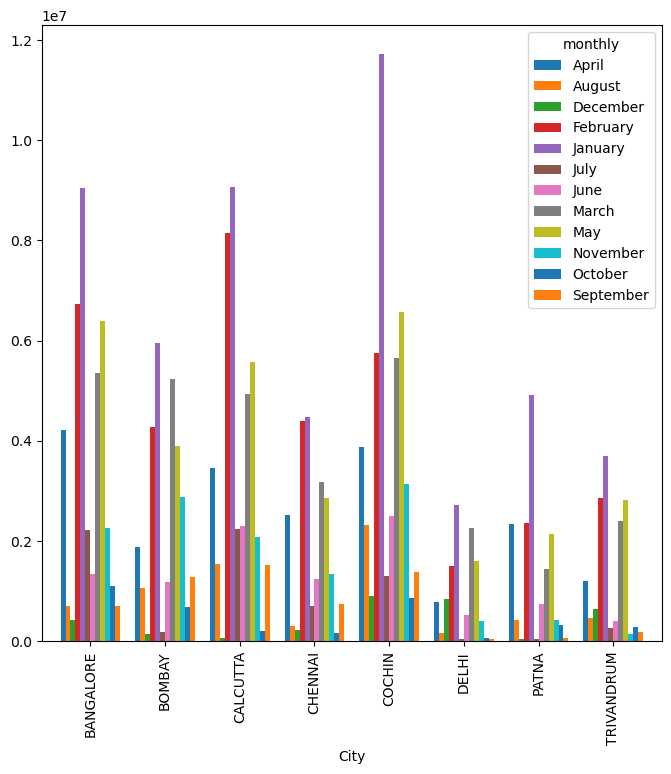

In [41]:
mc.pivot(index = 'City', columns = 'monthly' , values = 'Amount').plot(kind="bar",figsize=(8,8),width=0.8)
plt.show()

### ***b. Comparison of yearly spend on air tickets***

In [42]:
ca_sp.head(1)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,age_group,year,monthly
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,74-82,2004,January


In [43]:
at = ca_sp.loc[ca_sp.Type =='AIR TICKET', : : ]
at.head(1)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,age_group,year,monthly
9,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2006-04-19,AIR TICKET,346925.68,74-82,2006,April


In [44]:
ats = at.groupby(['Type','year'])['Amount'].sum().reset_index()

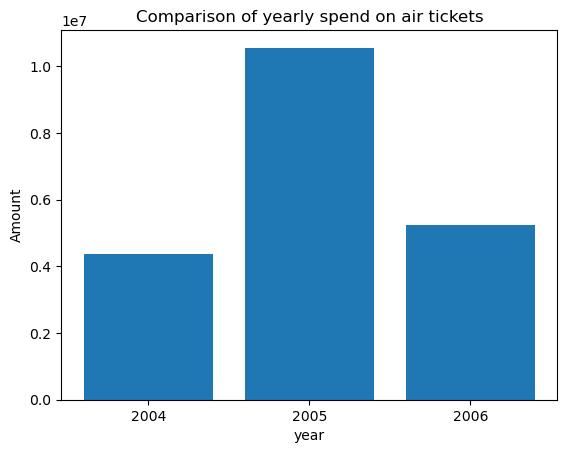

In [45]:
plt.bar(ats.year,ats.Amount)
plt.xlabel("year")
plt.ylabel("Amount")
plt.title("Comparison of yearly spend on air tickets")
plt.show()

 ### ***c. Comparison of monthly spend for each product (look for any seasonality                                                               that exists in terms of spend)***

In [46]:
mss = ca_sp.groupby(['Product','monthly'])['Amount'].sum().reset_index()

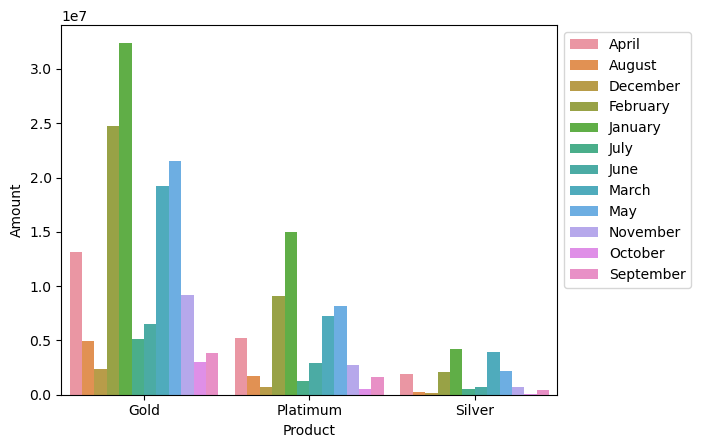

In [47]:
sns.barplot(data = mss , x='Product' , y = 'Amount' , hue = 'monthly' , width = 0.9  )
plt.legend( loc = 2, bbox_to_anchor = (1,1))
plt.show()

### ***For every product the spending has been highest in months of January and May particularly***

### ***5. Write user defined PYTHON function to perform the following analysis:                                                       You need to find top 10 customers for each city in terms of their repayment amount by                                                  different products and by different time periods i.e. year or month. The user should be able                                       to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the                                function should automatically take these inputs while identifying the top 10 customers.***

In [48]:
py = ca.merge(rp , how = 'inner' , on = 'Customer')
py.drop(columns = ['No','SL No:'] , inplace = True)

In [49]:
py.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,Month_name,Year_name
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,January,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,January,2004


In [50]:
def summary_report(product,timeperiod):
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = py.pivot_table(index=['Product','City','Customer'],columns='Month_name',values='Amount',aggfunc='sum')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        return result
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = py.pivot_table(index=['Product','City','Customer'],columns='Year_name',values='Amount',aggfunc='sum')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        return result
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Month_name',values='Amount',aggfunc='sum')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        return result
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Year_name',values='Amount',aggfunc='sum')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        return result
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Month_name',values='Amount',aggfunc='sum')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        return result
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Year_name',values='Amount',aggfunc='sum')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        return result

In [51]:
summary_report('gold','yearly')

Year_name                          2004        2005        2006
Product City       Customer                                    
Gold    BANGALORE  A1        1864383.09  1529158.77   864735.06
                   A13       2337012.77  3757673.00  3477314.89
                   A14       2770261.30  2491981.61  2681025.72
                   A30        978777.17  2667746.38  2486958.41
                   A43       1906497.47  4006956.60  2576417.39
                   A63        788855.60         NaN   211117.12
                   A81              NaN         NaN   207780.32
                   A88              NaN         NaN   146821.30
                   A92              NaN         NaN   459105.69
        COCHIN     A11        958556.39  2045470.88  2306906.76
                   A16       1122211.16  1226247.16  1911369.63
                   A32        344312.67   696673.46  1517308.65
                   A45       2557947.39  4042447.57  1847939.91
                   A61       2518154.95  4276860.55  3744127.41
                   A65        468922.60   230667.34         NaN
                   A90              NaN         NaN   109931.32
                   A94        153465.89         NaN         NaN
        CALCUTTA   A10        892190.53  1246843.93  1556613.06
                   A15       1051502.61  1720768.79  2783141.43
                   A29       1376793.94  1706779.22  3434298.00
                   A31        407599.13  1448641.71  1527798.41
                   A60       2890721.81  3742856.10  3242712.83
                   A89              NaN         NaN   497237.97
        BOMBAY     A12       2339080.90  2877588.30  3118090.96
                   A17       1425448.02   731143.83  3127783.14
                   A42       3045914.71  3125758.43  1443787.72
                   A62       1744114.25  1541617.21  1684085.69
                   A91              NaN         NaN   247781.00
        CHENNAI    A27       1842823.04  2782591.71  2387485.81
                   A67         67845.60    55638.77         NaN
        TRIVANDRUM A28        965108.49  2827009.82  3376614.65
        PATNA      A26       1490427.84  2433837.95  3330421.30
                   A66        477039.78         NaN   113094.58
                   A95        369405.96         NaN         NaN
        DELHI      A44       2149383.50  4165317.77  1430028.85
                   A64              NaN         NaN   323229.09
                   A82              NaN         NaN   342200.74
                   A93        342326.14         NaN         NaN